In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

import sklearn.metrics
!git clone https://github.com/Sagar610/CE888-Covid19


Cloning into 'CE888-Covid19'...
remote: Enumerating objects: 1844, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1844 (delta 0), reused 3 (delta 0), pack-reused 1840
Receiving objects: 100% (1844/1844), 456.61 MiB | 31.99 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [5]:
DIR = '/content/CE888-Covid19/COVID_CT_IMG/'
SUBDIR_POS = 'CT_COVID/'
SUBDIR_NEG = 'CT_NonCOVID/'
print(f'Positive samples: {len(os.listdir(DIR + SUBDIR_POS))}.')
print(f'Negative samples: {len(os.listdir(DIR + SUBDIR_NEG))}.')

Positive samples: 2.
Negative samples: 1.


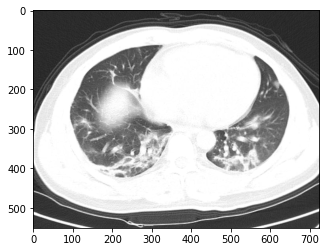

In [6]:
im = cv2.imread('/content/CE888-Covid19/COVID_CT_IMG/CT_COVID/CT_COVID/2020.01.24.919183-p27-132.png', 0) / 255
plt.imshow(im, cmap='gray', vmin=0, vmax=1) 
plt.show()

In [7]:
EPOCHS = 40
BATCH_SIZE = 64
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001 / EPOCHS)
img_height, img_width = 248, 248
es = EarlyStopping(monitor='val_acc', mode='max',
                   verbose=1, 
                   patience=10, restore_best_weights=True)

In [8]:
def create_model():
    model = Sequential([
        Conv2D(16, 1, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=OPTIMIZER,
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall'])
    
    return model

In [9]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        1

In [19]:
hist = model.fit(
        
        BATCH_SIZE,

      
        epochs = EPOCHS,
        verbose = 0, )

IndexError: ignored

NameError: ignored

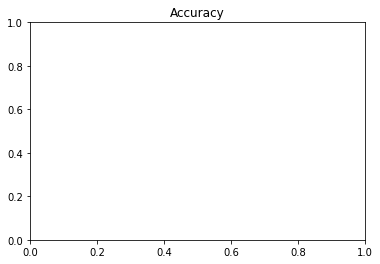

In [20]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Recall')
plt.plot(hist.history['Recall'])
plt.plot(hist.history['val_Recall'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Precision')
plt.plot(hist.history['Precision'])
plt.plot(hist.history['val_Precision'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
y_true = validation_generator.classes

for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):
    print(f'{name}: {value}')
    
print(f'F1 score: {sklearn.metrics.f1_score(y_true, y_pred)}')

In [ ]:
pd.DataFrame(sklearn.metrics.confusion_matrix(y_true, y_pred), 
             columns=['pred no covid', 'pred covid'], 
             index=['true no covid', 'true covid'])

### Saving model

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")